## 0) 전처리

#### Import

In [14]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

#### Data Load

#####  Train set에는 사기 여부 X
#####  Validation set에는 사기 여부 O (정상 : 0, 사기 :1 )

In [66]:
train_df = pd.read_csv('data/train.csv') # Train : 113842 rows × 31 columns
val_df = pd.read_csv('data/val.csv') # Validation : 28462 rows × 32 columns
test_df = pd.read_csv('data/test.csv') # Test : 142503 rows × 31 columns

In [5]:
test_df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,0x4587f,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,0.028645,1.034904
142499,0x45880,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,0.810312,1.034916
142500,0x45884,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,1.034963
142501,0x45885,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,1.034975


In [6]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


##### 결측치 확인

In [7]:
train_df.isnull().sum()

ID     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
dtype: int64

In [8]:
val_df.isnull().sum()

ID       0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
Class    0
dtype: int64

In [9]:
test_df.isnull().sum()

ID     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
dtype: int64

## 1) EDA

In [10]:
val_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,...,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,...,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,...,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,...,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,...,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,...,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,...,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


##### Train & Validation Feature 분포 확인

In [11]:
train = train_df.drop(['ID'],axis=1)
val = val_df.drop(['ID'],axis=1)
test = test_df.drop(['ID'],axis=1)

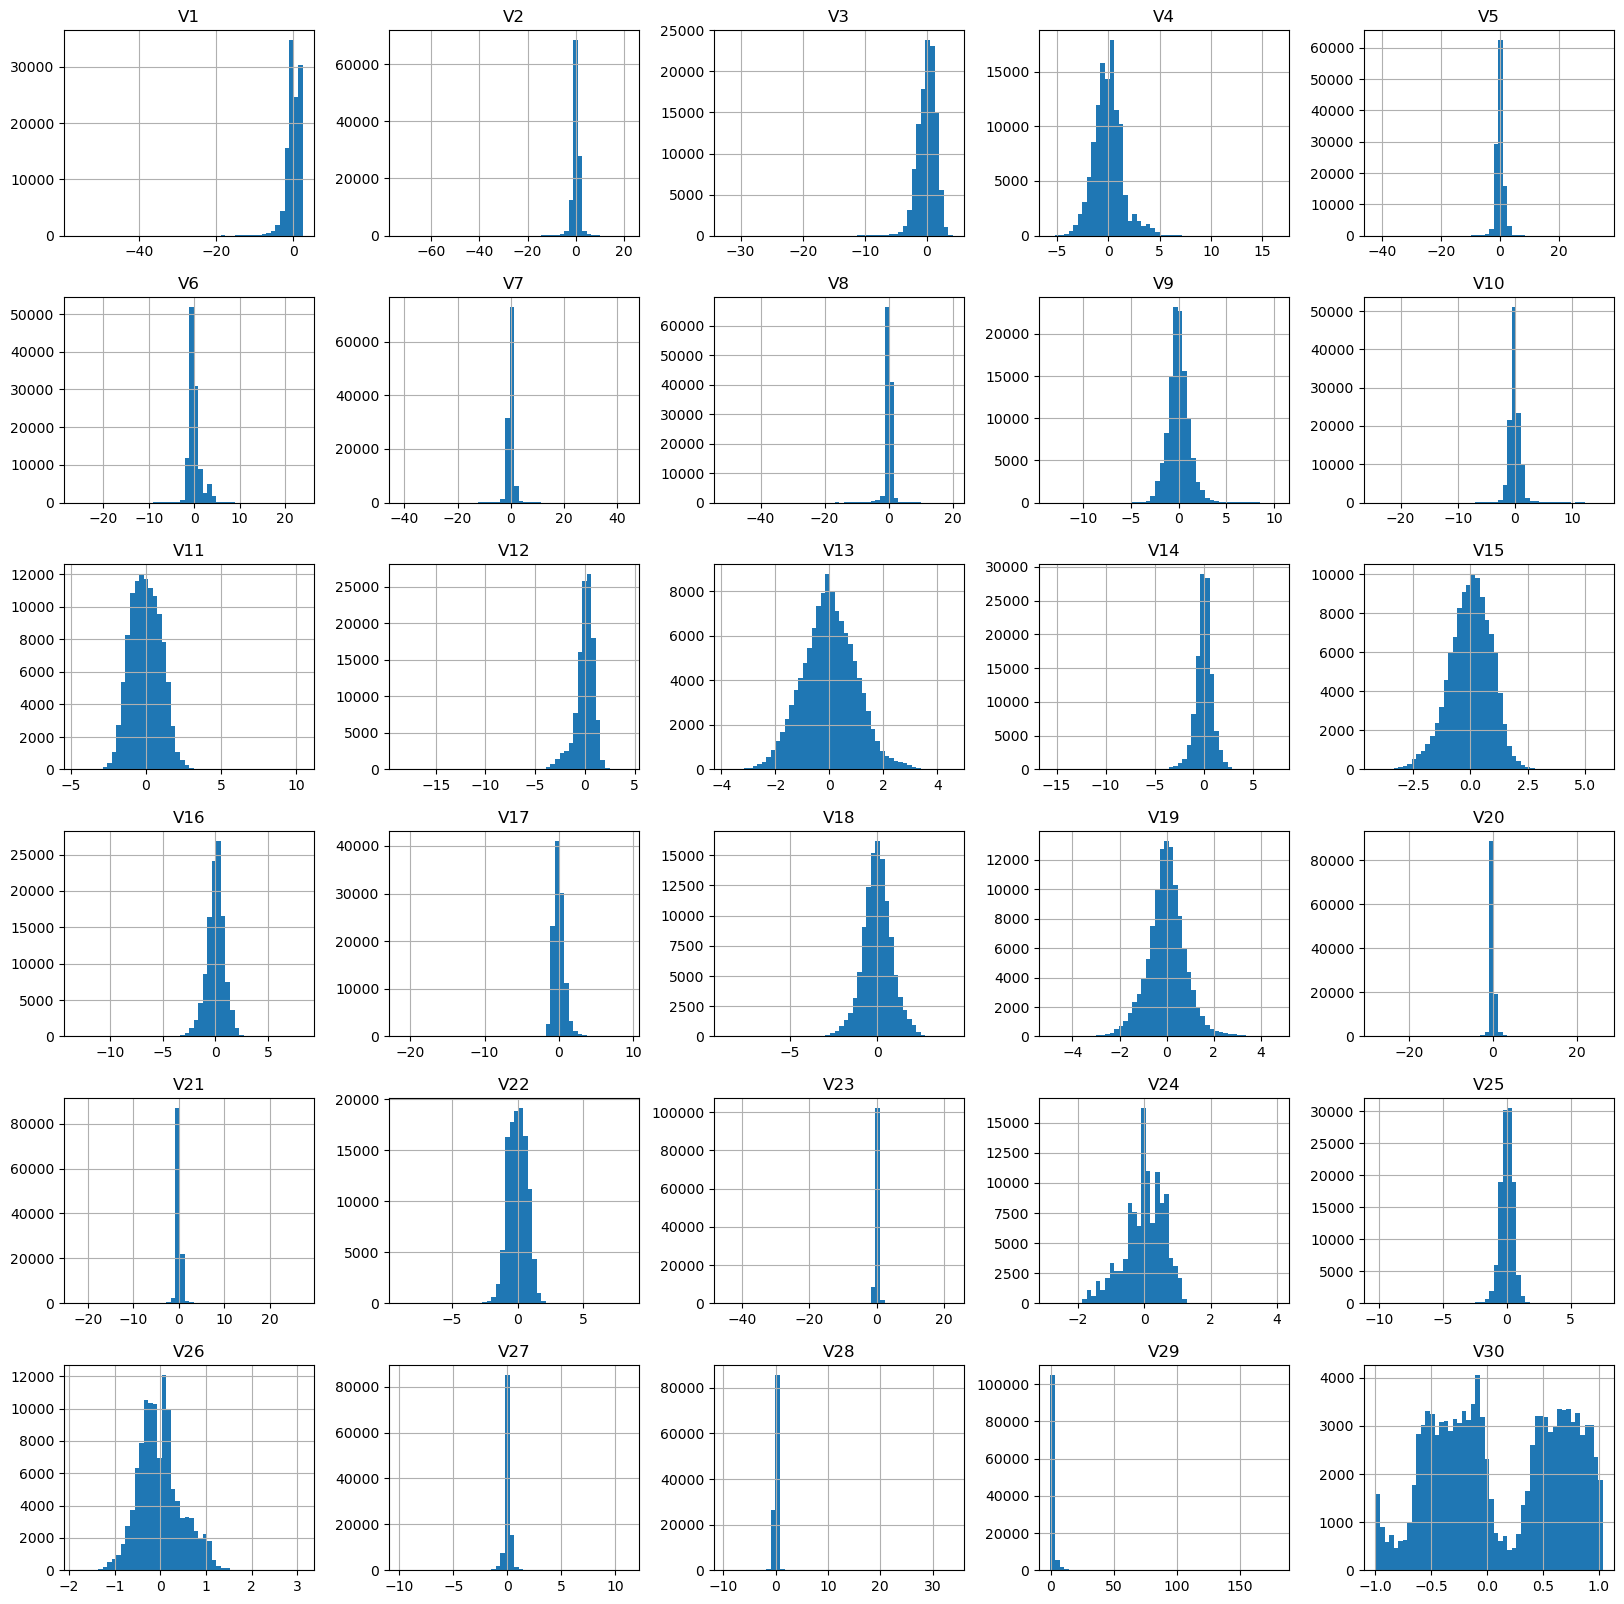

In [15]:
train.hist(bins = 50, figsize = (20,20))
plt.show()

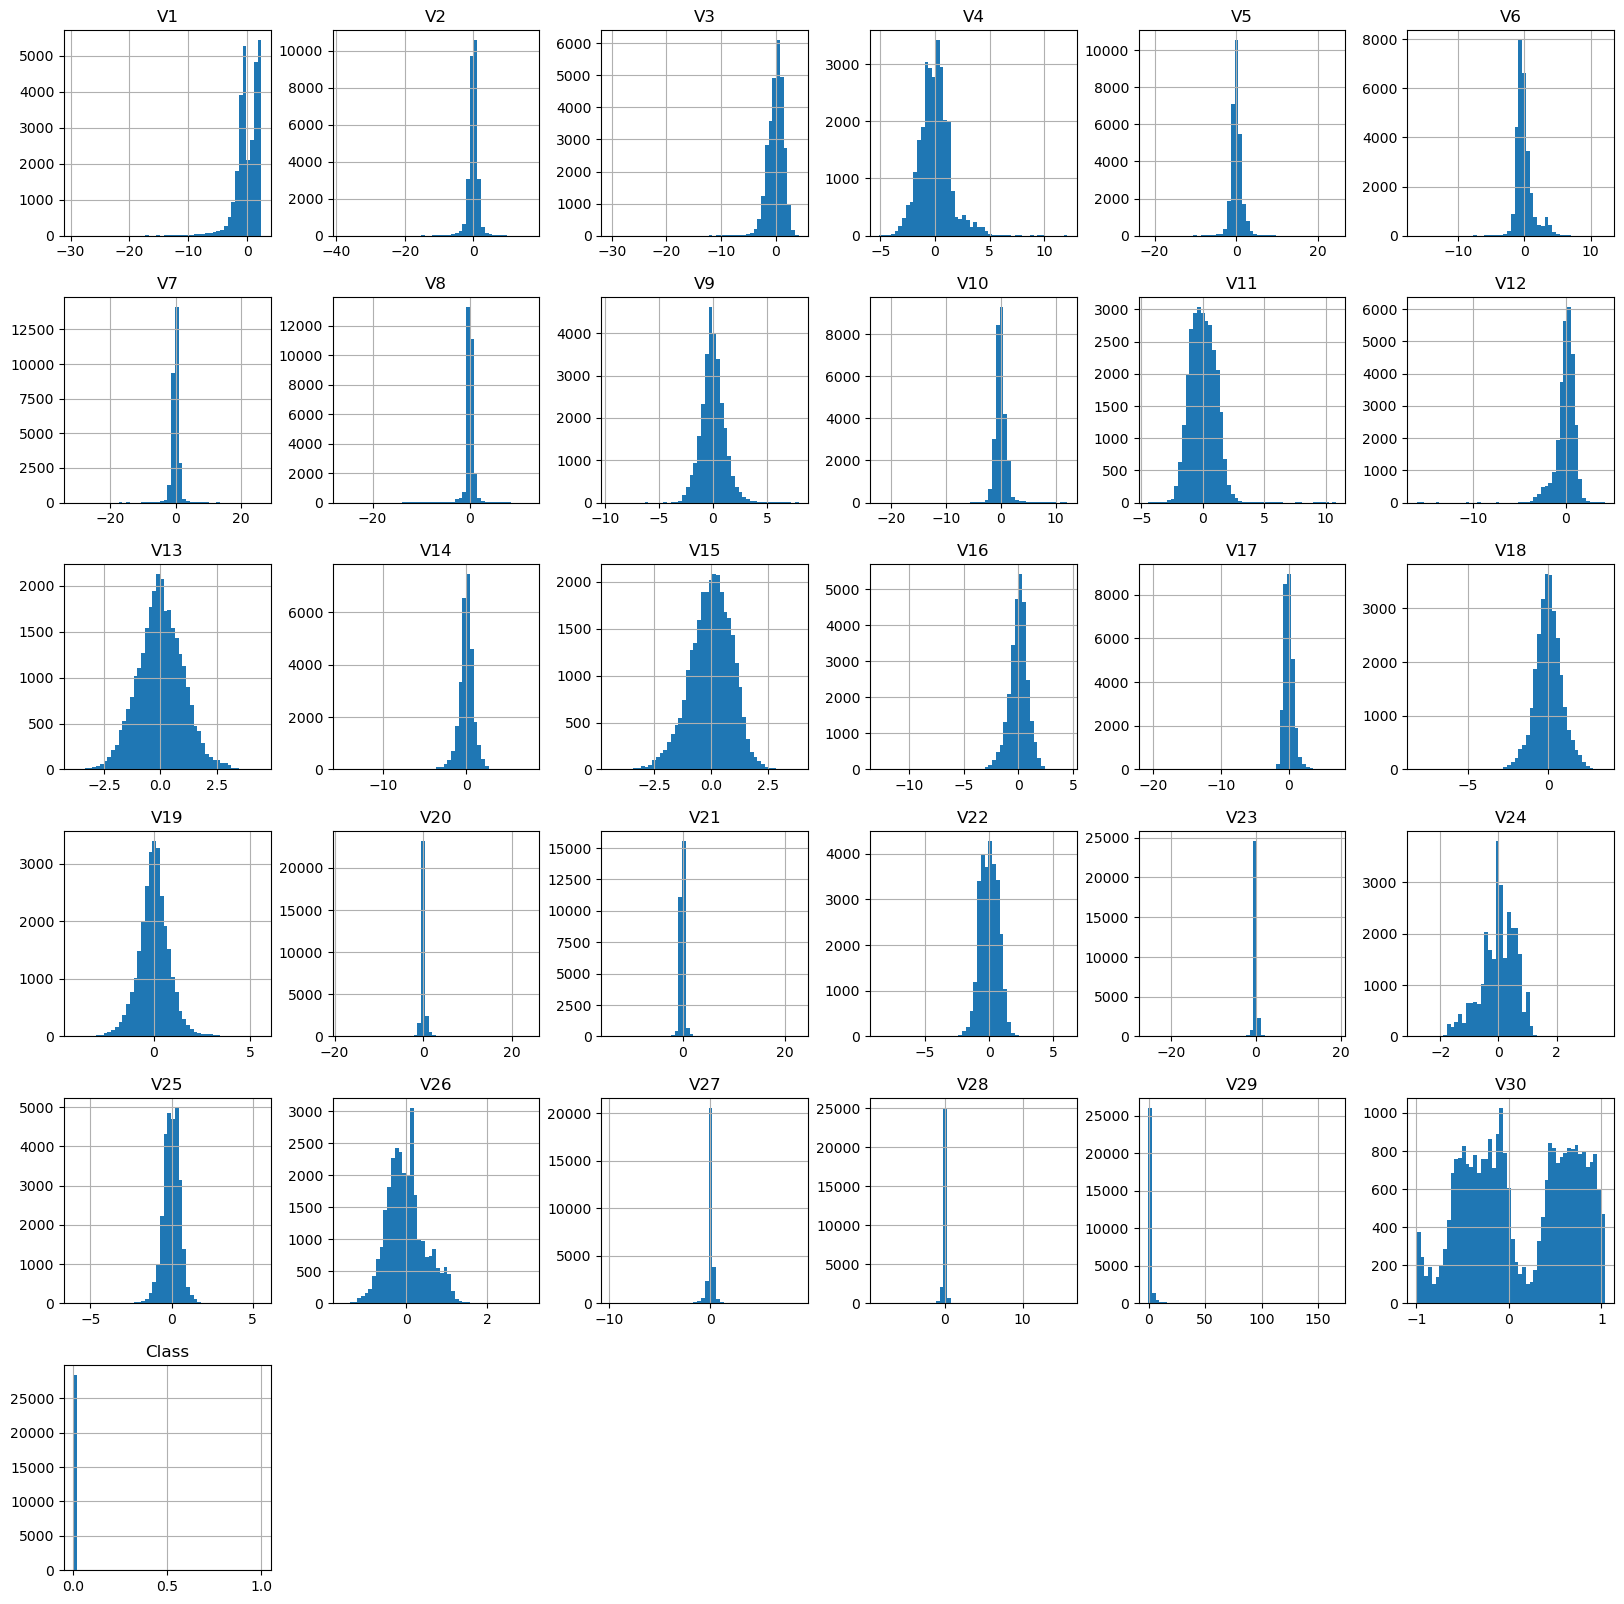

In [16]:
val.hist(bins = 50, figsize = (20,20))
plt.show()

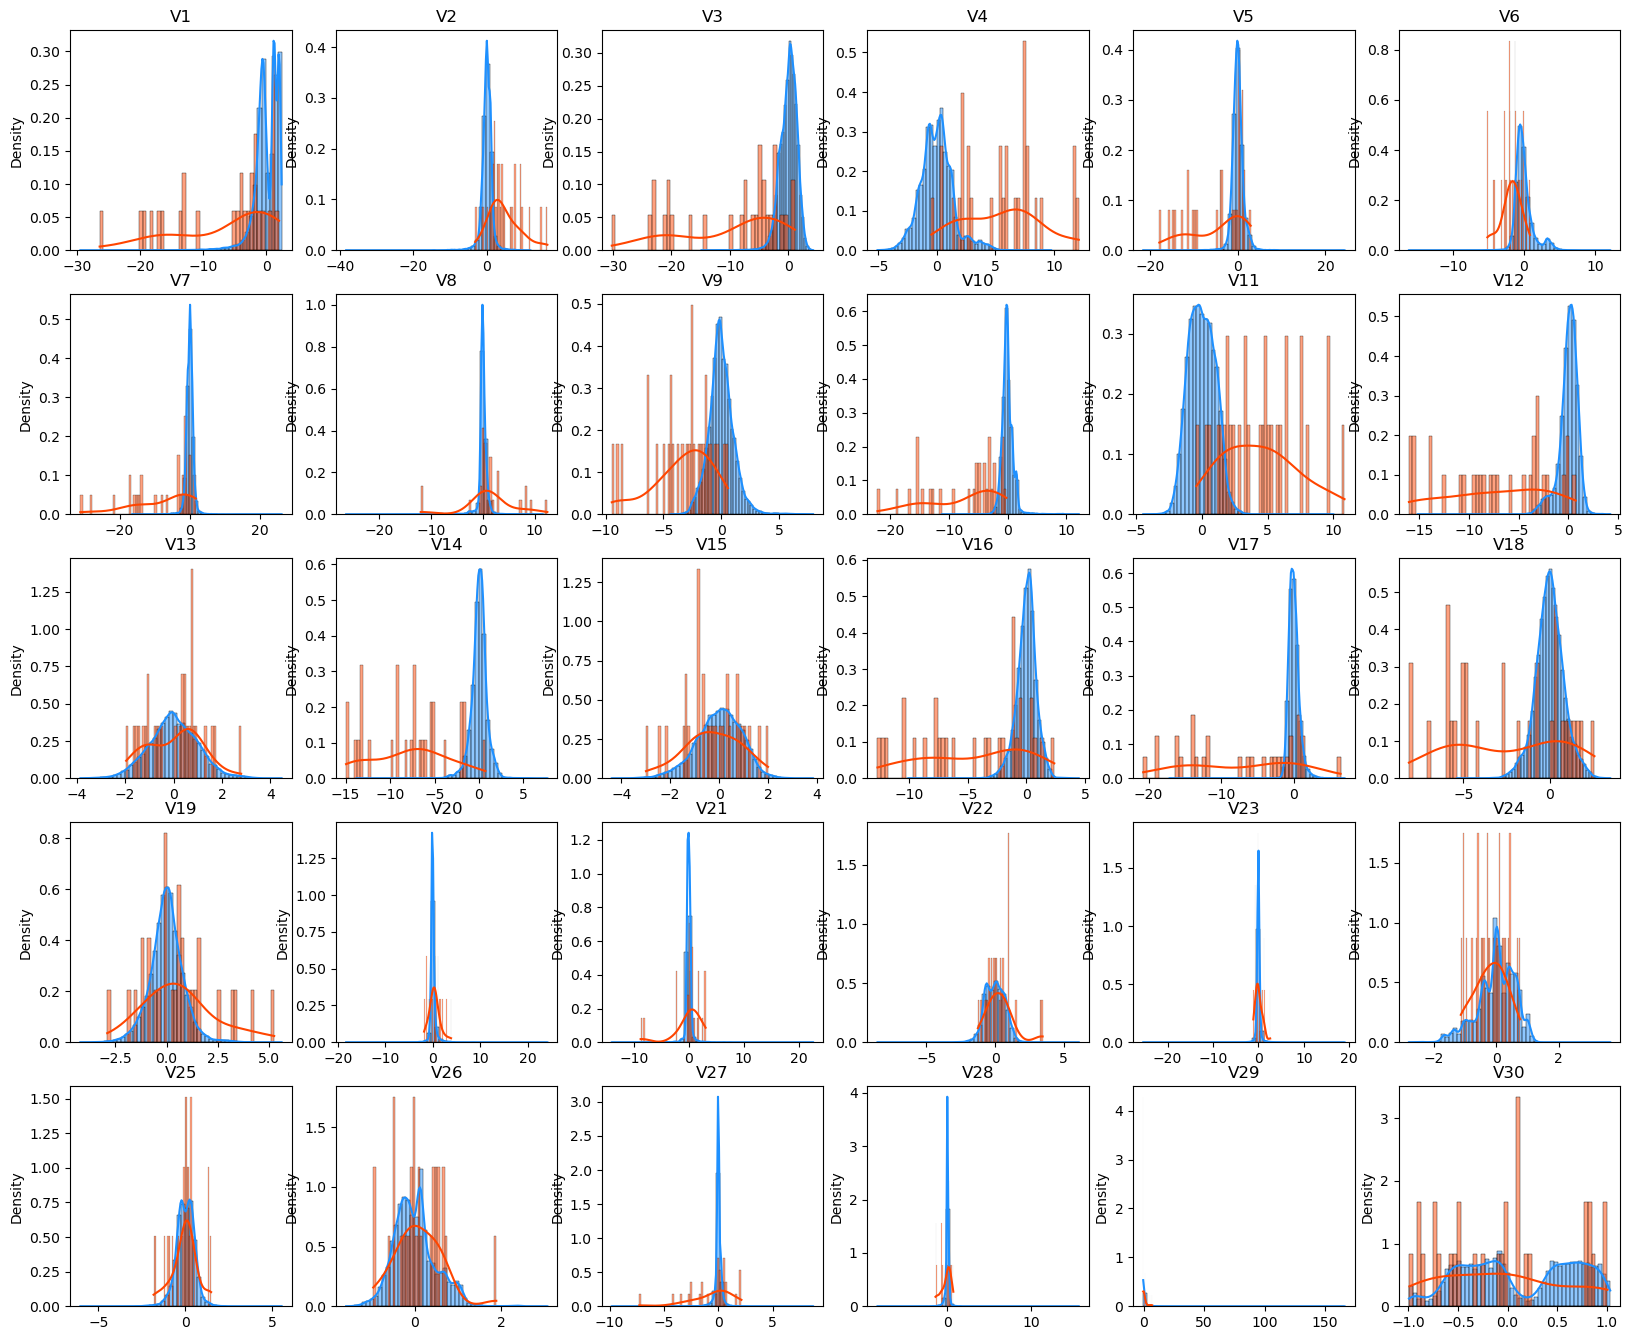

In [17]:
val_class0 = val[val['Class']==0]
val_class1 = val[val['Class']==1]
columns = val.drop('Class', axis=1).columns

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt 
import seaborn as sns 

grid = gridspec.GridSpec(6, 6)
plt.figure(figsize=(20, 20))

for n, col in enumerate(val_df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(val_class0[col], bins=50, color='dodgerblue', stat='density', kde=True)
    sns.histplot(val_class1[col], bins=50, color='orangered', stat='density', kde=True)
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

Features correlation

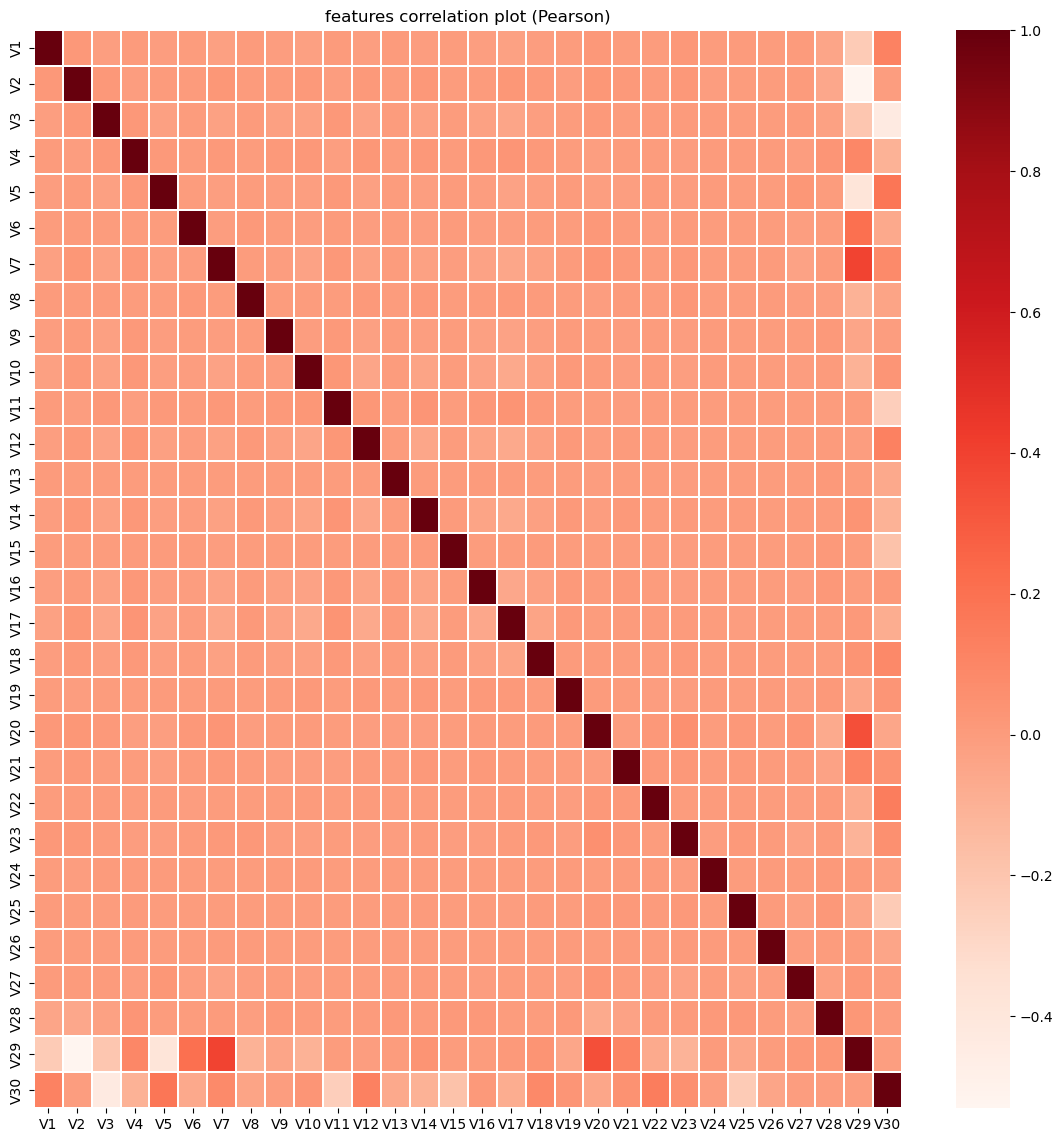

In [18]:
plt.figure(figsize = (14,14))
plt.title('features correlation plot (Pearson)')
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [23]:
val_normal, val_fraud = val['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'정상 데이터 : {val_normal}, 사기 데이터 : {val_fraud}')
print(f'검증 데이터의 사기 비율 : [{val_contamination}]')

정상 데이터 : 28432, 사기 데이터 : 30
검증 데이터의 사기 비율 : [0.0010551491277433877]


## 2) 베이스라인 모델

#### 알고리즘 1 : k-means

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

In [67]:
train_df.shape, val_df.shape, test_df.shape

((113842, 31), (28462, 32), (142503, 31))

In [68]:
# 데이터 셋 가공
k_X_train = train_df.drop('ID', axis=1)

k_X_val = val_df.drop(['ID', 'Class'], axis=1)
k_y_val = val_df['Class']

k_X_test = test_df.drop('ID', axis=1)

# shape 확인
k_X_train.shape, k_X_val.shape, k_y_val.shape, k_X_test.shape

((113842, 30), (28462, 30), (28462,), (142503, 30))

In [69]:
# 모델 학습
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(k_X_train)
kmeans_val_pred = kmeans.predict(k_X_val.to_numpy())

# 모델 결과 확인
unique, counts = np.unique(kmeans_val_pred, return_counts=True)
kmeans_contamination = counts[1] / counts[0]
print(f'클래스 : {unique}, 클래스별 개수 : {counts}')
print(f'정상 데이터 : {counts[0]}, 사기 데이터 : {counts[1]}')
print(f'검증 데이터의 사기 비율 : [{kmeans_contamination}]')

# 모델 성능 확인
print(classification_report(k_y_val, kmeans_val_pred))

클래스 : [0 1], 클래스별 개수 : [27911   551]
정상 데이터 : 27911, 사기 데이터 : 551
검증 데이터의 사기 비율 : [0.019741320626276378]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.00      0.00      0.00        30

    accuracy                           0.98     28462
   macro avg       0.50      0.49      0.49     28462
weighted avg       1.00      0.98      0.99     28462



In [39]:
val_df['anomaly'] = kmeans_val_pred

In [44]:
print(val_df['anomaly'])

0        0
1        0
2        0
3        0
4        0
        ..
28457    0
28458    0
28459    0
28460    0
28461    0
Name: anomaly, Length: 28462, dtype: int32


In [45]:
print(val_df)

           ID        V1        V2        V3        V4        V5        V6  \
0          10 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
1          22  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038   
2          63  1.145524  0.575068  0.194008  2.598192 -0.092210 -1.044430   
3          69  0.927060 -0.323684  0.387585  0.544474  0.246787  1.650358   
4          83 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575   
...       ...       ...       ...       ...       ...       ...       ...   
28457  284769 -0.546378  1.433992 -0.313252  0.926044  0.522388 -0.565669   
28458  284779 -0.764523  0.588379 -0.907599 -0.418847  0.901528 -0.760802   
28459  284790 -0.446951  1.302212 -0.168583  0.981577  0.578957 -0.605641   
28460  284801  2.039560 -0.175233 -1.196825  0.234580 -0.008713 -0.726571   
28461  284806 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   

             V7        V8        V9  ...       V23       V24       V25  \
0

In [77]:
f1_score_k = f1_score(val_df['Class'], val_df['anomaly'], average='macro')

KeyError: 'anomaly'

In [70]:
print(f'Validation F1 Score : [{f1_score}]')
print(classification_report(k_y_val, kmeans_val_pred))

Validation F1 Score : [0.4948440800099391]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.00      0.00      0.00        30

    accuracy                           0.98     28462
   macro avg       0.50      0.49      0.49     28462
weighted avg       1.00      0.98      0.99     28462



## 3) 성능개선 과정

#### 알고리즘 2 : One Class SVM

In [ ]:
# 모델 학습
ocsvm=OneClassSVM()
ocsvm.fit(X_train)
ocsvm_val_pred = ocsvm.predict(X_val)
ocsvm_val_pred = get_pred_label(ocsvm_val_pred)

# 모델 결과 확인
unique, counts = np.unique(ocsvm_val_pred, return_counts=True)
unique, counts
ocsvm_contamination = counts[1] / counts[0]
print(f'클래스 : {unique}, 클래스별 개수 : {counts}')
print(f'정상 데이터 : {counts[0]}, 사기 데이터 : {counts[1]}')
print(f'검증 데이터의 사기 비율 : [{ocsvm_contamination}]')

# 모델 성능 확인
print(classification_report(y_val, ocsvm_val_pred))

In [54]:
def get_pred_label(model_pred):
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [59]:
f1_score = f1_score(val_df['Class'], val_df['anomaly'], average='macro')

In [71]:
# 모델 학습
ell = EllipticEnvelope(contamination=val_contamination)
ell.fit(k_X_train)
ell_val_pred = ell.predict(k_X_val)
ell_val_pred = get_pred_label(ell_val_pred)

# 모델 결과 확인
unique, counts = np.unique(ell_val_pred, return_counts=True)
ell_contamination = counts[1] / counts[0]
print(f'클래스 : {unique}, 클래스별 개수 : {counts}')
print(f'정상 데이터 : {counts[0]}, 사기 데이터 : {counts[1]}')
print(f'검증 데이터의 사기 비율 : [{ell_contamination}]')


클래스 : [0 1], 클래스별 개수 : [28438    24]
정상 데이터 : 28438, 사기 데이터 : 24
검증 데이터의 사기 비율 : [0.0008439412054293551]


In [76]:
f1_score

0.4948440800099391

In [75]:
# 모델 성능 확인
#ell_f1 = f1_score(k_y_val, ell_val_pred, average = "macro")
ell_report = classification_report(k_y_val, ell_val_pred)
print(ell_report)
print(f'Validation F1 Score : [{f1_score}]')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462

Validation F1 Score : [0.4948440800099391]


#### 알고리즘 3 : IsolationForest
밀도 기반으로 이상치를 탐지하는 알고리즘<br>
Random Forest의 변형 알고리즘

데이터의 이상치가 속한 구역을 찾아내기 위해 무작위로 분할을 수행하는 결정트리 이용 (균등하게 분할되지 X)

--> 무작위 분할을 통해 각 분할 구간의 경계선을 찾아내며, 이를 이용하여 이상치 구별

각 결정트리에서 이상치로 판단되는 데이터는 더 적은 분할 횟수를 거침

장점
- 이상치 탐지에 있어 성능이 높다
- 학습 데이터의 크기에 비해 빠른 속도로 탐지
- 상대적으로 적은 메모리 필요

단점
- 특정 데이터에 대해 이상치를 정확하게 판단하지 못함

##### (*) Validation set의 사기 거래 비율이 다른 데이터 셋에서도 비슷하게 발생할 것이라고 가정
    -> model parameter : contamination=val_contamination(=0.001055) 적용

In [24]:
#validation set에서의 사기 비율
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'사기 비율 : {val_contamination}')

사기 비율 : 0.0010551491277433877


In [49]:
from sklearn.ensemble import IsolationForest 

IFmodel=IsolationForest(n_estimators=125, 
                      max_samples=len(train_df), 
                      contamination=val_contamination, 
                      random_state=42, 
                      verbose=0)
IFmodel.fit(train_df)

IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=125, random_state=42)

In [40]:
# decision_function(), predict() 메서드
# score=IFmodel.decision_function(train_df.to_numpy())
# anomaly=IFmodel.predict(train_df.to_numpy())
# train_df['scores']=score

In [41]:
# 데이터 프레임 이상치 탐지
# train_df['anomaly']=anomaly

In [42]:
# anomaly 컬럼에서 1과 0의 개수를 세어 출력
# train_df['anomaly'].value_counts()

 1    113721
-1       121
Name: anomaly, dtype: int64

In [43]:
# anomaly가 있는 행 추출하기,

# anomaly_data=train_df.loc[train_df['anomaly']==-1]
# anomaly_data

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,V29,V30,scores,anomaly
3494,8611,-27.670569,-34.607649,2.243079,10.463020,34.099309,-23.496714,-26.548144,-0.779134,7.496577,...,-11.669994,2.192626,-2.483069,1.788189,8.254376,-3.509250,0.464613,-0.858457,-0.155059,-1
3711,9180,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,-0.293440,-0.840776,-0.086452,-1
4298,10631,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,...,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,10.401174,-0.785418,-0.090140,-1
4324,10682,-3.408448,4.634203,-8.986378,5.767694,-4.340056,-3.267062,-8.215842,2.652823,-3.323071,...,0.013462,-0.020885,-0.057518,-0.303920,2.096459,0.670476,0.950045,-0.782763,-0.032310,-1
4368,10784,-4.071799,4.929765,-9.523349,5.791918,-4.772561,-3.307247,-8.513680,3.073999,-3.297625,...,-0.023827,-0.017298,-0.003155,-0.302673,2.074226,0.662986,0.950045,-0.779297,-0.024758,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105084,262840,-31.972536,-22.709113,-13.942635,12.132323,-12.217243,6.721727,8.956140,-2.100171,5.795877,...,-14.078082,1.519264,-0.562652,-0.018176,-6.617555,15.124103,19.828967,0.892597,-0.072932,-1
105086,262844,-34.092032,-24.237418,-15.758012,12.672760,-14.913249,7.939152,11.118494,-1.985873,5.693151,...,-13.615143,1.542827,-0.332634,-0.058112,-6.782493,14.974180,19.828967,0.892633,-0.081306,-1
105220,263179,-5.264016,5.795819,-5.589389,-0.254669,-0.186981,7.321806,-13.143440,-30.890785,-3.329952,...,2.560238,-1.514784,-0.780412,-0.265229,-0.146737,0.758428,-0.224970,0.894524,-0.064811,-1
108226,270738,-8.052539,5.891158,-3.390105,-0.635573,-2.299022,8.000839,-14.576443,-33.785407,-3.790132,...,2.629387,-0.687518,-0.906524,-0.854034,-1.120806,-0.220221,1.184657,0.934468,-0.078541,-1


In [50]:
X_val = val_df.drop(['Class'],axis=1)
Y_val = val_df['Class']

In [51]:
IF_val_pred = IFmodel.predict(X_val)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- anomaly
- scores


In [ ]:
# 모델 결과 확인
unique, counts = np.unique(IF_val_pred, return_counts=True)
IF_contamination = counts[1] / counts[0]
print(f'클래스 : {unique}, 클래스별 개수 : {counts}')
print(f'정상 데이터 : {counts[0]}, 사기 데이터 : {counts[1]}')
print(f'검증 데이터의 사기 비율 : [{IF_contamination}]')

print(classification_report(y_val, IF_val_pred))

## 4) 최종 모델

시각화

In [31]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from mpl_toolkits.mplot3d import Axes3D

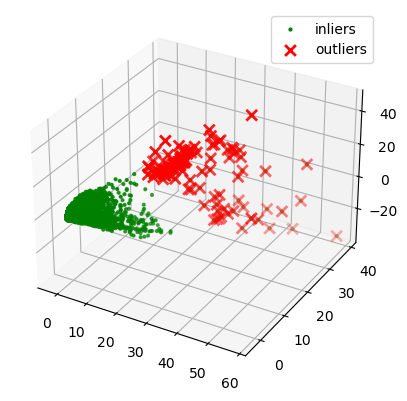

In [32]:
# PCA를 적용하기 전, 데이터 표준화
pca=PCA(n_components=3)
scaler=StandardScaler()

# n_components 매개변수로 축소할 차원의 수 지정
X=scaler.fit_transform(train_df)
X_reduce=pca.fit_transform(X)
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# 시각화를 위해 3D 산점도 사용
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, 
           lw=1, label='inliers', c='green')

# scatter() 함수를 사용하여 축소된 데이터셋을 3D 산점도로 그림
anomaly_index=list(anomaly_data.index)
ax.scatter(X_reduce[anomaly_index,0],X_reduce[anomaly_index,1], X_reduce[anomaly_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

## 5) 결론

알고리즘적으로는 "비지도 학습"알고리즘을 사용하지만
목적은 "지도 학습"